PG47428 - Luís Miguel Lopes Pinto - MEI

**EXERCICIO 1 - Futoshiki Puzzle**
-- --
- *Input* : 
Um ficheiro de input válido consiste num tabuleiro de dimensão NxN com as células vazias representadas por 0 e com as células fixas representadas por números. Em adição, separado por um paragrafo, encontram-se representadas as restrições de desigualdade do Futoshiki puzzle. 

A titulo de exemplo, aparece de seguida o ficheiro "Input1.txt" de dimensão 5x5. A sua primeira restrição está representada por - "1,2,1,1" - isto significa que o valor da célula da linha indice 1 e coluna indice 2 tem de ser **inferior** relativamente ao valor indicado na célula na linha indice 1 e coluna indice 1. (esta foi a abordagem adotada para exprimir as restrições de desigualdade contidas no tabuleiro)

      0 0 0 0 0
      4 0 0 0 2
      0 0 4 0 0
      0 0 0 0 4
      0 0 0 0 0

      1,2,1,1
      1,4,1,3
      1,5,1,4
      4,4,4,5
      5,1,5,2
      5,2,5,3


Dado o ficheiro anterior (Input1.txt), obtemos a sua Representação Visual do Puzzle Futoshiki:

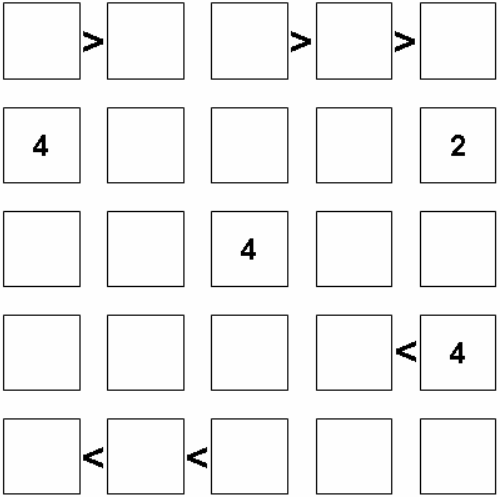



Instalação da API Z3 do Python

In [7]:
!pip install z3-solver

E respetivo importe

In [8]:
from z3 import *

Criação do Ficheiro de Input

Iremos usar o exemplo discutido anteriormente ( 'Input1.txt' ) para a exemplificação do funcionamento do programa. Assim sendo mantem-se o puzzle de dimensão 5x5 com as respetivas restrições de desigualdade e valores fixos.

In [9]:
f = open("Input1.txt", "w")
# puzzle values
f.write("0 0 0 0 0\n4 0 0 0 2\n0 0 4 0 0\n0 0 0 0 4\n0 0 0 0 0\n")
f.write("\n")
# puzzle inequality constraints. E.g: cell(1,2) < cell(1,1)
f.write("1,2,1,1\n1,4,1,3\n1,5,1,4\n4,4,4,5\n5,1,5,2\n5,2,5,3")
f.close()

- *Codigo* : 
  - Leitura do input 'Input1.txt': 

    Através da leitura do ficheiro ficaremos a saber quais as células com valores fixos, quais as restrições do puzzle e qual a dimensão do puzzle, N. A variavel *matrix* servira para guardar os valores (de 0 até N) presentes em cada celula numa lista de listas/matriz, a variavel *lt* servirá para guardar as condições de desigualdade e a variavel *restrictions* tem apenas o proposito de controlo do ciclo de leitura do ficheiro, para distinguir quando estamos a ler os valores do puzzle (restrictions = False) e quando estamos a ler as restrições estipuladas (restrictions = True). 

  - Restrições logicas do jogo

    No que toca as restrições e regras do jogo, foi preciso codificar uma matriz de inteiros X de modo a criar variaveis para identificar as respetivas células do tabuleiro, indicar que em cada celula apenas existe um e só um numero e que esse numero está contido no intervalo fechado entre 1 e N (a dimensão do puzzle) e por fim estabelcer que em cada linha ou coluna tem de estar presentes todos os digitos desde 1 até N, que de certa forma impõe a não existência de valores repetidos em cada linha ou coluna. 
    
    Depois de estarem estabelecidas todas as regras, basta apenas tratar de aplicar os dados lidos no ficheiro de input a solução. Para isso percorreram-se as estruturas de dados *matrix* e *lt* de modo a passar os valores fixos para as respetivas váriaveis do tabuleiro e a adicionar as clausulas de desigualdade, respetivamente. Assim, estamos aptos para conseguir obter a solução final.

  - Solver e Solução 

    O último passo será então obter a solução para o nosso Futoshiki Puzzle através do solver, em caso de sucesso ocorrerá impressão da solução obtida no ecrã. 



In [10]:
# futoshiki instance, we use '0' for empty cells
matrix = []

# [i1,j1, i2,j2] requires that values[i1,j1] < values[i2,j2]
# Note: 1-based
lt = []

# Reading input file
restrictions = False

f = open("Input1.txt", "r")
for x in f:
    if (x == '\n'):
        restrictions = True
    elif (restrictions == False):
        linelist = x.split(" ")
        # Define board size 
        N = len(linelist)
        # String to int
        for i in range(0,N):
            linelist[i] = int(linelist[i])

        # Add new line to matrix
        matrix.append(linelist)
    else:
        restriction = x.split(",")
        # String to int
        for i in range(0,4):
            restriction[i] = int(restriction[i])
        # Add new line to matrix
        lt.append(restriction)


# NxN matrix of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(N) ]
      for i in range(N) ]

# each cell contains a value in {1, ..., N}
cells_c  = [ And(1 <= X[i][j], X[i][j] <= N)
             for i in range(N) for j in range(N) ]

# each row contains a digit at most once
rows_c   = [ Distinct(X[i]) for i in range(N) ]

# each column contains a digit at most once
cols_c   = [ Distinct([ X[i][j] for i in range(N) ])
             for j in range(N) ]

futoshiki_c = cells_c + rows_c + cols_c 

# add fixed puzzle values presented in the input file
instance_c = [ If(matrix[i][j] == 0,
                  True,
                  X[i][j] == matrix[i][j])
               for i in range(N) for j in range(N) ]

s = Solver()
s.add(futoshiki_c + instance_c)

# add puzzle restrictions
for i in lt:
    s.add(X[i[0]-1][i[1]-1] < X[i[2]-1][i[3]-1])

if s.check() == sat:
    m = s.model()
    r = [ [ m.evaluate(X[i][j]) for j in range(N) ]
          for i in range(N) ]
    print_matrix(r)
else:
    print("failed to solve")

[[5, 4, 3, 2, 1],
 [4, 3, 1, 5, 2],
 [2, 1, 4, 3, 5],
 [3, 5, 2, 1, 4],
 [1, 2, 5, 4, 3]]


- *Output* : De acordo com o puzzle apresentado anteriormente, a solução obtida foi a seguinte. Tal como podemos ver as regras definidas anteriormente foram respeitadas, isto é, tanto os valores fixos, como as restrições de desigualdade e todas as restrições relativas as regras e modo de funcionamento do jogo. 

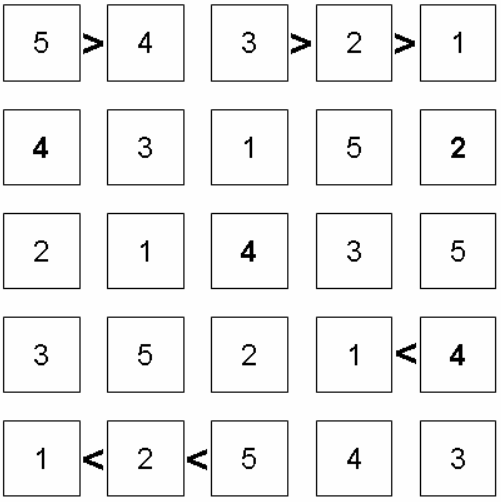
